In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Performing EDA on the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<b> + Let's draw a plot which will help us visualize the total number of customers churns & do not churn

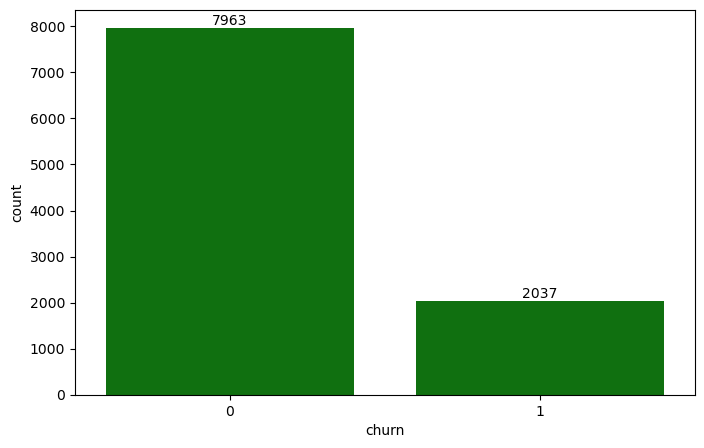

<Figure size 640x480 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.countplot(data=data, x='churn', color='green')
for i in ax.containers:
    ax.bar_label(i)
plt.show()
plt.tight_layout()

In [6]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
data.shape

(10000, 12)

In [8]:
data[data['gender']=='Male'].shape

(5457, 12)

In [9]:
data[data['gender']=='Female'].shape

(4543, 12)

+ <b> churn 1 Indicates that the customer has left. Churn 0 Indicates that the customer is there.

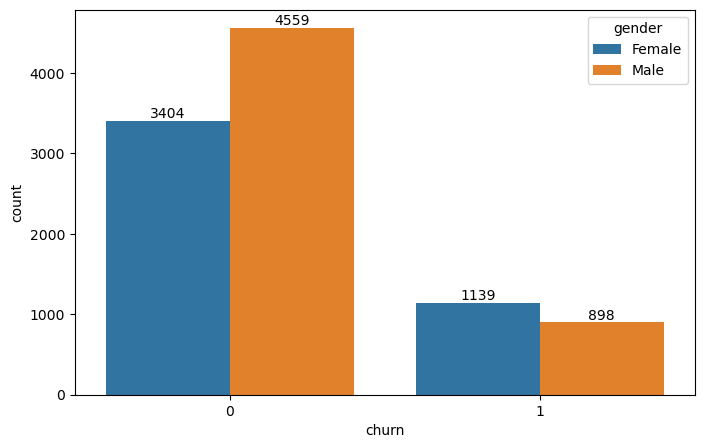

In [10]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.countplot(data=data, x='churn', hue='gender')
# ax.bar_label()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

[Text(0, 0.5, 'Tenure'), Text(0.5, 0, 'Churn')]

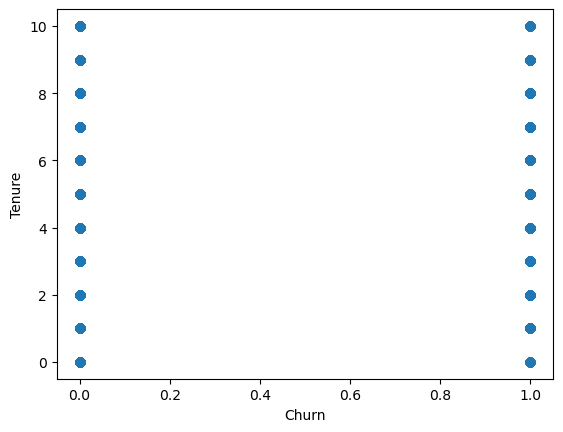

In [11]:
ax = plt.subplot(111)
plt.scatter(y=data['tenure'], x=data['churn'])
ax.set(ylabel='Tenure', xlabel='Churn')

### Visualising the distribution of the numerical columns

In [12]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [13]:
infor = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


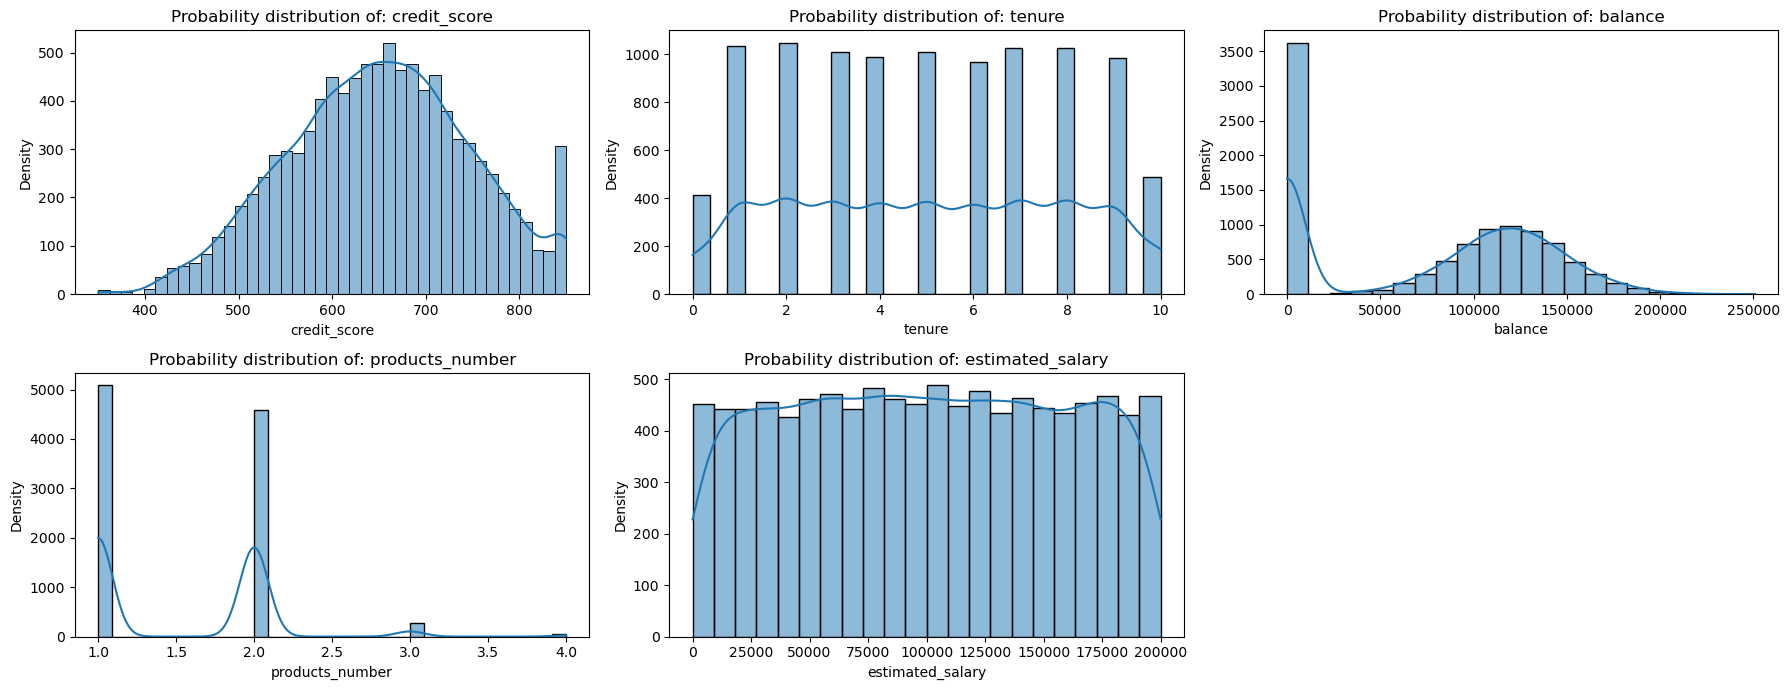

In [14]:
numerical_features = ['credit_score','tenure','balance','products_number','estimated_salary']

plt.figure(figsize=(18,7))

for i , feature in enumerate(numerical_features,start=1):
#     print(i,feature)
    plt.subplot(2,3,i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Probability distribution of: {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.tight_layout()

### Visualising the categorical data distribution

In [15]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

1 gender
2 country


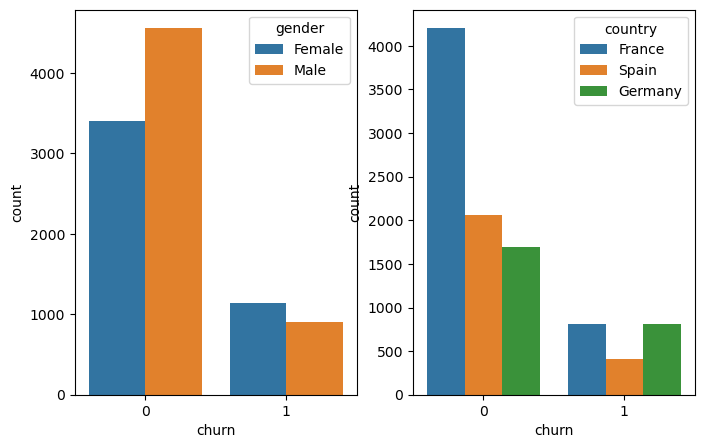

In [16]:
categorical_features = ['gender','country']

fig = plt.figure(figsize=(8,5))
for i,feature in enumerate(categorical_features,start = 1):
    print(i, feature)
    plt.subplot(1,2,i)
    sns.countplot(data=data, x='churn', hue=feature)

### <b>Visualising the correlation heatmap <b>


By seeing at the correlation heatmap, we can find out whether any two or more columns are highly
dependent on each other or not. Because if multiple independent columns are dependent on each
other then there is a chance that the multicollinearity situation will develop which is not good
for the model. Let's draw the heatmap for all the numeric field.

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_1424/2448968204.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrics = data.corr(method='pearson',min_periods=1)


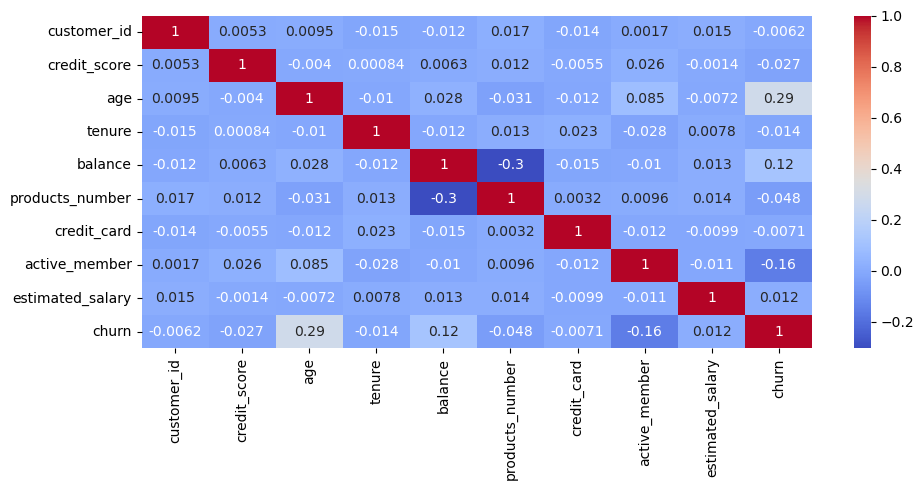

In [17]:
plt.figure(figsize=(10,5))
corr_matrics = data.corr(method='pearson',min_periods=1)

sns.heatmap(corr_matrics, annot=True, cmap='coolwarm')
plt.tight_layout()

### Preprocessing

+ Encoding the categorical data & scaling the numerical data

In [18]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
scaler = StandardScaler()

#### Train - Test Split

In [19]:
categorical_features

['gender', 'country']

In [20]:
numerical_features

['credit_score', 'tenure', 'balance', 'products_number', 'estimated_salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['churn'], axis=1), 
                                                    data['churn'], test_size=0.2,
                                                    random_state=42)

In [22]:
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

/Users/adityanarayandas/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.fit_transform(X_test[numerical_features])

In [24]:
X_train_encoded.shape

(8000, 5)

In [25]:
X_train_scaled.shape

(8000, 5)

In [26]:
X_train_processed = np.concatenate((X_train_encoded,X_train_scaled), axis=1)

In [27]:
X_train_processed.shape

(8000, 10)

In [28]:
X_test_processed = np.concatenate((X_test_encoded,X_test_scaled), axis=1)

In [29]:
X_test_processed.shape

(2000, 10)

In [30]:
X_train_processed

array([[ 0.        ,  1.        ,  1.        , ..., -1.21847056,
         0.80843615,  1.36766974],
       [ 0.        ,  1.        ,  0.        , ...,  0.69683765,
         0.80843615,  1.6612541 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.61862909,
        -0.91668767, -0.25280688],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.21847056,
         2.53355998, -0.1427649 ],
       [ 0.        ,  1.        ,  1.        , ...,  1.8272593 ,
        -0.91668767, -0.05082558],
       [ 0.        ,  1.        ,  0.        , ...,  1.1497197 ,
        -0.91668767, -0.81456811]])

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train_processed,y_train)
y_pred = logreg.predict(X_test_processed)
accuracy_score(y_test,y_pred)

0.8035

In [32]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: churn, Length: 2000, dtype: int64

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
f1_score(y_test,y_pred)

0.0

In [35]:
precision_score(y_test,y_pred)

/Users/adityanarayandas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [36]:
confusion_matrix(y_test,y_pred)

array([[1607,    0],
       [ 393,    0]])

In [37]:
from sklearn.metrics import classification_report

In [43]:
classification_report(y_test,y_pred)

/Users/adityanarayandas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adityanarayandas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adityanarayandas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      1607\n           1       0.00      0.00      0.00       393\n\n    accuracy                           0.80      2000\n   macro avg       0.40      0.50      0.45      2000\nweighted avg       0.65      0.80      0.72      2000\n'

In [40]:
{
    "tags": [
        "output_scroll",
    ]
}

{'tags': ['output_scroll']}

In [44]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_processed,y_train)
y_pred = logreg.predict(X_test_processed)
accuracy_score(y_test,y_pred)

0.627

In [45]:
confusion_matrix(y_test,y_pred)

array([[1019,  588],
       [ 158,  235]])

In [46]:
f1_score(y_test,y_pred)

0.38651315789473684

In [57]:
logreg.intercept_

array([0.01006782])

In [58]:
logreg.class_weight

'balanced'

In [59]:
logreg.coef_

array([[ 0.27951058, -0.26950588, -0.28168491,  0.48888821, -0.1971986 ,
        -0.07698176, -0.0333288 ,  0.15894958, -0.07734435,  0.02379421]])

### Logistic Regression from Scratch Using Gradient Descent Technique

In [53]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [95]:
class GradientDescentLogistic:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.coefficient = None
        self.intercept = None
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        self.weights =  np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X_train,self.weights))
            if i == 2:
                print('Find the training prediction')
                print(y_hat)
            loss_slope = (-1/X_train.shape[0]) * np.dot(y_train-y_hat, X_train)
            self.weights = self.weights + self.learning_rate * loss_slope
            
            #Findig the coefficient of the hyperpalne equation
        self.coefficient = self.weights[1:]
        self.intercept = self.weights[0]
            
        return self.weights[1:], self.weights[0]
    
    def predict(self,X_test):
        the_separation_eqn_found = np.dot(self.coefficient , X_test[0]) + self.intercept
        print(the_separation_eqn_found)
        X_test = np.insert(X_test, 0,1, axis=1)
        
        y_pred = sigmoid(np.dot(X_test,self.weights))
        
        arr =[]
        
        for i in y_pred:
            if i>0.5:
                arr.append(1)
            else:
                arr.append(0)
        
#         y_pred_arr = []
        
#         for i in y_pred:
#             if i > the_separation_eqn_found:
#                 y_pred_arr.append(1)
#             else:
#                 y_pred_arr.append(0)
        

        return arr

In [51]:
# X_train_processed

In [96]:
myRegression = GradientDescentLogistic(0.01,1000)
myRegression.fit(X_train_processed, y_train)

Find the training prediction
[0.99091135 0.99646214 0.69248977 ... 0.97529196 0.99386316 0.8204628 ]


(array([4.32380699, 5.46224105, 5.09604582, 2.67289145, 3.01711077,
        1.23236012, 1.16171952, 0.58685896, 1.27109499, 1.06403343]),
 8.78604803895824)

In [98]:
y_pred = myRegression.predict(X_test_processed)

15.62369126191713


In [99]:
accuracy_score(y_test,y_pred)

0.1965